# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [1]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

1. Financial System: Nodes= Financial Institution; Links= Money Flows

2. GitHub: Nodes=Users; Links=Forks / Pull Requests

3. Pandemic: Nodes=infected persons; links=transmission

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:

Banking System / Financial System

>   * What are its nodes and links? 

Nodes = Banks / Financial Institutions

>   * How large is it? 

Huge.
Bank assets, percent of GDP, 2017 
In Denmark: 172% 

The market capitalization of the global banking sector as of October 2019 was $7.9 trillion. Total 90 trillions

>   * Can be mapped out? 

Yes. We can look at financial flows, payments flows or any other measure of interconnection between banks.

>   * Why do you care about it? 

From the Financial Crisis 2008/2009 and the crisis today, we can see how important the finacial system is. And a good understanding of the connection of banks ( the network of the financial system) is important to make it more resilient and robust.

> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

Economically, I think big tech firms will use network effects to concentrate market power and gain big profits. 

Scientifically, network science will hopefully have a big postive impact on the design and production of drugs and on regulation as argued before.  

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

In real networks L is much smaller than Lmax, reflecting the fact that most real networks are sparse. We call a network sparse if L‹‹ Lmax. 

Lmax=N / 2= N *(N−1)/ 2

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

In [3]:
G = nx.Graph()
# Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc)

# 1. add nodes & edges

# add one node
G.add_node(1)

# add a list of nodes
G.add_nodes_from([2, 3])

# add a list of edges
G.add_edges_from([('a', 'b'), ('c', 'd')])



In [4]:
# 2 print
G.nodes

NodeView((1, 2, 3, 'a', 'b', 'c', 'd'))

In [5]:
G.edges

EdgeView([('a', 'b'), ('c', 'd')])

In [6]:
G.adj

AdjacencyView({1: {}, 2: {}, 3: {}, 'a': {'b': {}}, 'b': {'a': {}}, 'c': {'d': {}}, 'd': {'c': {}}})

In [7]:
G.degree

DegreeView({1: 0, 2: 0, 3: 0, 'a': 1, 'b': 1, 'c': 1, 'd': 1})

In [8]:
# 3. delete
G.remove_node(1)

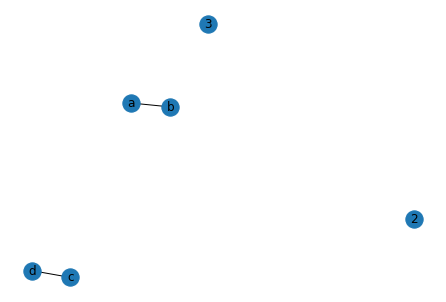

In [9]:
# 4. plot
nx.draw(G, with_labels=True)

> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

**1:**

A Erdős–Rényi (ER) network or G(n,p) model is constructed by connecting nodes randomly.  are equally likely Each edge is included in the graph with probability p independent from every other edge. In the model of Erdős and Rényi, all graphs on a fixed vertex set with a fixed number of edges are equally likely (Wikipedia).

p: weighting function --> higher p means that network more likely to include graphs with more edges



In [10]:
# 2: generate ER network
small = nx.gnp_random_graph(n=50, p=0.1)
small_2 = nx.gnp_random_graph(n=50, p=0.5)

ER = nx.gnp_random_graph(n=500, p=0.1)

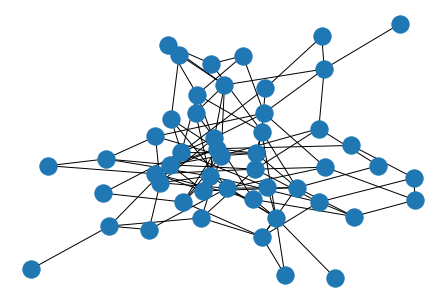

In [11]:
# 3: plot
nx.draw(small)

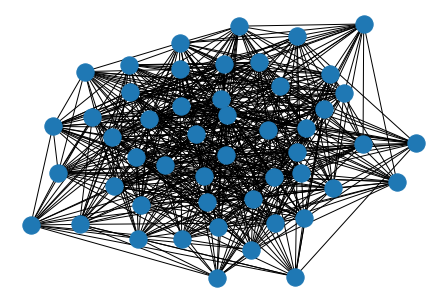

In [12]:
nx.draw(small_2)

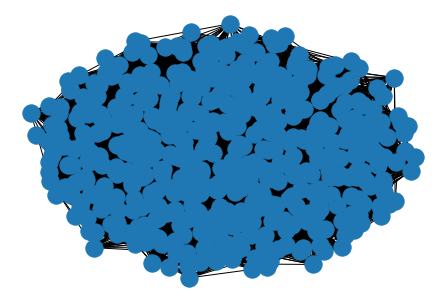

In [13]:
nx.draw(ER)

In [14]:
ER.number_of_nodes()

500

In [15]:
# 4: visualize degree distribution
from collections import Counter
from scipy.special import comb

def compute_degree_distribution(network, p=0.1, kind=ER):
    N = network.number_of_nodes()
    
    # Compute the empirical degree distribution
    degrees = sorted([d for n, d in network.degree()]) # Degree of each node
    counts = Counter(degrees) # Count the number of times each value of d appears
    degrees, counts = zip(*counts.items()) # extract into two lists
    emprical_probs = [c/N for c in counts] # convert from counts to probabilities
    
    if (kind==ER):
        # Compute the theoretical degree distribution of a Erdős–Rényi (ER) network.
        theoretical_probs = [comb(N-1, k) * (p**k) * (1-p)**(N-1-k) for k in degrees]
    
    elif (kind==BA):
        # Compute the theoretical degree distribution of a Barabási–Albert (BA) network.
        ## solution of google:
        theoretical_probs = [(k**(-3)) for k in degrees]
        
        
    return degrees, emprical_probs, theoretical_probs
    

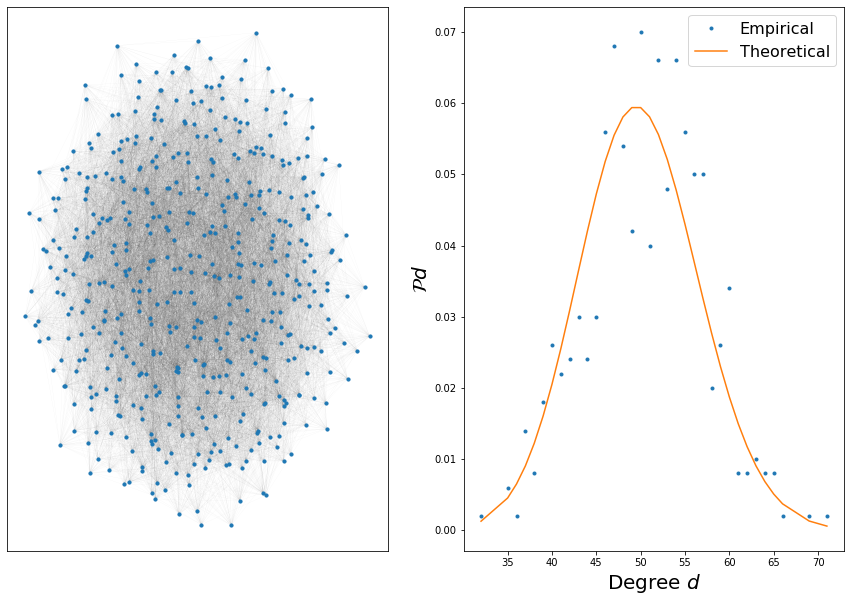

In [16]:
degr, probs, ther = compute_degree_distribution(ER, 0.1, kind=ER)

fig, ax = plt.subplots(1,2, figsize =(15,10))
pos = nx.spring_layout(ER)
nx.draw_networkx_nodes(ER, pos, node_size=10, with_labels=False, ax= ax[0])
nx.draw_networkx_edges(ER, pos, alpha = 0.1, width=0.1, ax = ax[0])

ax[1].plot(degr, probs, '.', label='Empirical')
ax[1].plot(degr, ther, label = 'Theoretical')
ax[1].set_xlabel('Degree $d$', fontsize =20)
ax[1].set_ylabel('$\mathcal{P}{d}$', fontsize=20)
ax[1].legend(frameon=True, fontsize=16)

> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

**1:**
    
BA algorithm: generates random scale-free networks, meaning that they have power-law (or scale-free) degree distributions.

The power law (also called the scaling law) states that a relative change in one quantity results in a proportional relative change in another. A power law distribution has the form Y = k X**α,

It incorporates two important general concepts: growth and preferential attachment.

- Growth means that the number of nodes in the network increases over time.
- Preferential attachment means that the more connected a node is, the more likely it is to receive new links. Nodes with a higher degree have a stronger ability to grab links added to the network.



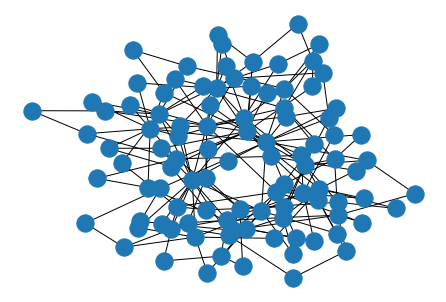

In [17]:
# 2
BA = nx.barabasi_albert_graph(n=100, m=2)
# 3
nx.draw(BA)

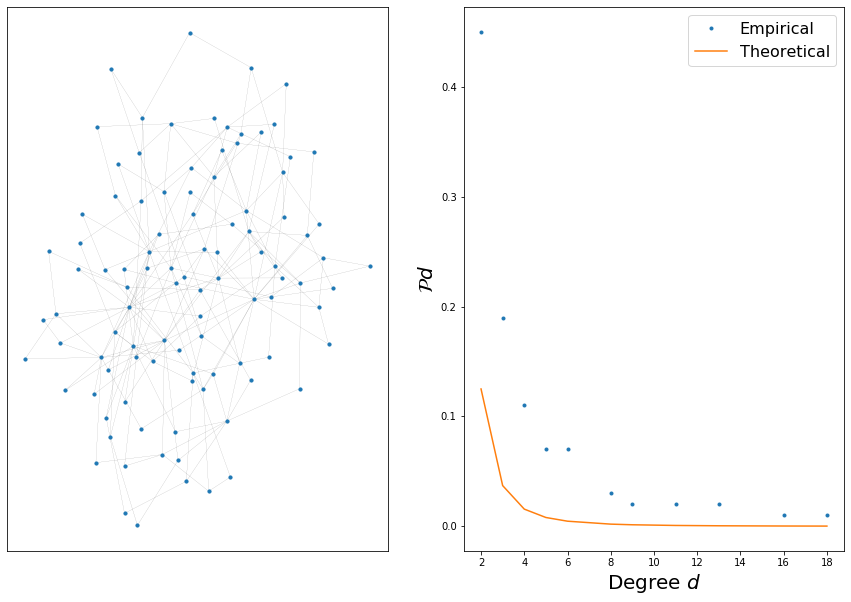

In [18]:
## wrong answer given write-up
degr, probs, ther = compute_degree_distribution(BA, kind=BA)


fig, ax = plt.subplots(1,2, figsize =(15,10))
pos = nx.spring_layout(BA)
nx.draw_networkx_nodes(BA, pos, node_size=10, with_labels=False, ax= ax[0])
nx.draw_networkx_edges(BA, pos, alpha = 0.7, width=0.1, ax = ax[0])

ax[1].plot(degr, probs, '.', label='Empirical')
ax[1].plot(degr, ther, label = 'Theoretical')
ax[1].set_xlabel('Degree $d$', fontsize =20)
ax[1].set_ylabel('$\mathcal{P}{d}$', fontsize=20)
ax[1].legend(frameon=True, fontsize=16)

In [19]:
def BA_degree_distribution(network, m=2):
    N = network.number_of_nodes()
    
    # Compute the empirical degree distribution
    degrees = sorted([d for n, d in network.degree()]) # Degree of each node
    counts = Counter(degrees) # Count the number of times each value of d appears
    degrees, counts = zip(*counts.items()) # extract into two lists
    emprical_probs = [c/N for c in counts] # convert from counts to probabilities
    
    
    # Compute the theoretical degree distribution of a Barabási–Albert (BA) network.
    theoretical_probs = [(2*m*(m+1)/(k*(k+1)*(k+2))) for k in degrees]
        
        
    return degrees, emprical_probs, theoretical_probs

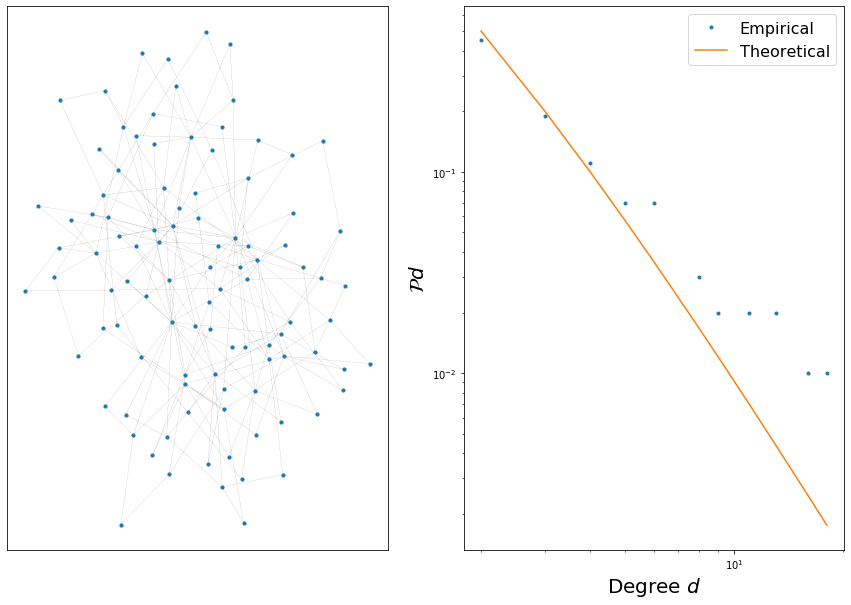

In [20]:
# 4
degr, probs, ther = BA_degree_distribution(BA, m=2)


fig, ax = plt.subplots(1,2, figsize =(15,10))
pos = nx.spring_layout(BA)
nx.draw_networkx_nodes(BA, pos, node_size=10, with_labels=False, ax= ax[0])
nx.draw_networkx_edges(BA, pos, alpha = 0.7, width=0.1, ax = ax[0])

ax[1].plot(degr, probs, '.', label='Empirical')
ax[1].plot(degr, ther, label = 'Theoretical')
ax[1].set_xlabel('Degree $d$', fontsize =20)
ax[1].set_ylabel('$\mathcal{P}{d}$', fontsize=20)
ax[1].legend(frameon=True, fontsize=16)
ax[1].set_yscale('log')
ax[1].set_xscale('log')

**5 Differences:**

-BA: some nodes have many links, while most of the nodes have just very few links. Therefore, there are some nodes that connect all the other nodes indirectly.

-ER: the amount of links of a node, is poisson distributed. Hence, the nodes are connected more directly. Moreover, there seems to be much more links. 
    


**6 other measures:**

- average distance ‹d› 
- maximum distance dmax
- Clustering Coefficient


### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [21]:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [22]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

In [23]:
x = 60*60*24
x

86400

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [24]:
## dont really understand the task. How I understood it: the t0 and t1 should be flexible (function input).
# Timestamps are in seconds. 

def aggregated_network(d=0, h=0, min=0, sec=0):
    t0 = data.timestamp.max() - 86400 * d - 60*60*h - 60*min - sec  # how far back should the network go
    t1 = data.timestamp.max()  # always ends at the last timestamp
    
    
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    
    return G_t    

In [25]:
fb = aggregated_network(d=365)


N = fb.number_of_nodes()
E = fb.number_of_edges()
    
    
    
print('Number of Nodes: ' + str(N))  
print('Number of Edges: ' + str(E))

Number of Nodes: 44397
Number of Edges: 201632


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

In [26]:
def fb_degree_distribution(network):
    N = network.number_of_nodes()
    
    # Compute the empirical in-degree distribution
    in_degrees = sorted([d for n, d in network.in_degree()]) # In-Degree of each node
    counts_in = Counter(in_degrees) # Count the number of times each value of d appears
    degrees_in, counts_in = zip(*counts_in.items()) # extract into two lists
    emprical_probs_in = [c/N for c in counts_in] # convert from counts to probabilities

    # Compute the empirical out-degree distribution
    out_degrees = sorted([d for n, d in network.out_degree()]) # Out-Degree of each node        
    counts_out = Counter(out_degrees) # Count the number of times each value of d appears
    degrees_out, counts_out = zip(*counts_out.items()) # extract into two lists
    emprical_probs_out = [c/N for c in counts_out] # convert from counts to probabilities
    
    
    return degrees_in, degrees_out, emprical_probs_in , emprical_probs_out, counts_in, counts_out

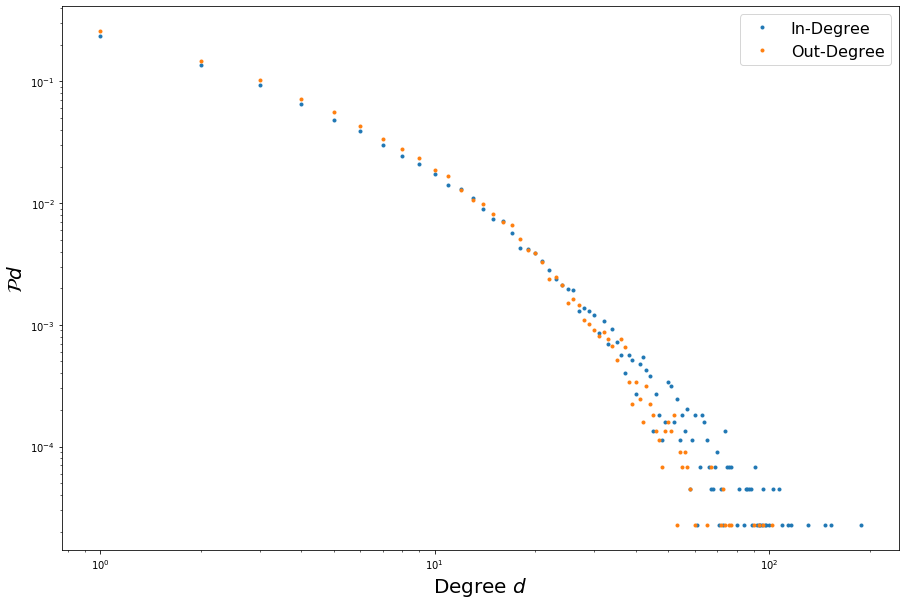

In [27]:
d_in, d_out, probs_in, probs_out, counts_in, counts_out = fb_degree_distribution(fb)


fig, ax = plt.subplots(figsize =(15,10))

ax.plot(d_in, probs_in, '.', label='In-Degree')
ax.plot(d_out, probs_out, '.', label='Out-Degree')
ax.set_xlabel('Degree $d$', fontsize =20)
ax.set_ylabel('$\mathcal{P}{d}$', fontsize=20)
ax.legend(frameon=True, fontsize=16)
ax.set_yscale('log')
ax.set_xscale('log')

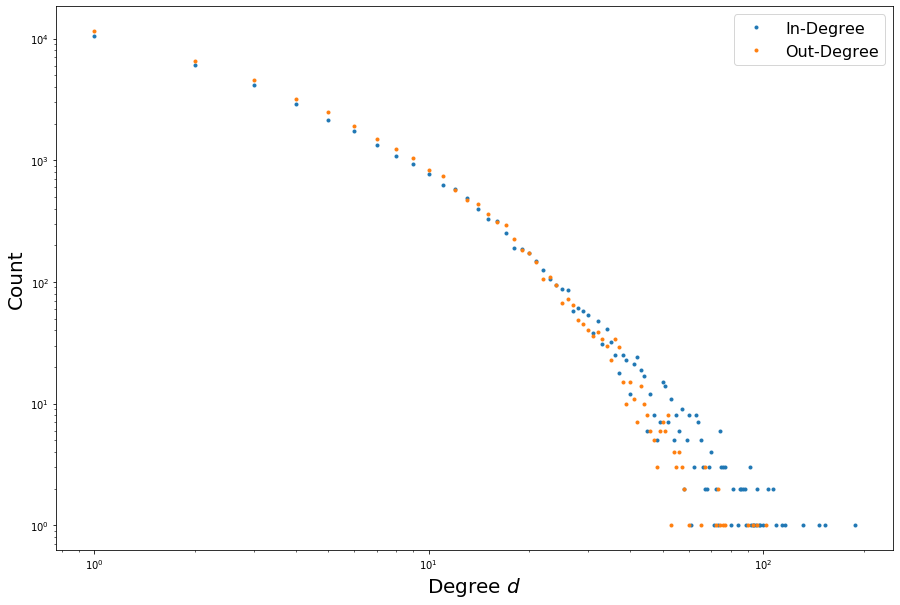

In [28]:
fig, ax = plt.subplots(figsize =(15,10))

ax.plot(d_in, counts_in, '.', label='In-Degree')
ax.plot(d_out, counts_out, '.', label='Out-Degree')
ax.set_xlabel('Degree $d$', fontsize =20)
ax.set_ylabel('Count', fontsize=20)
ax.legend(frameon=True, fontsize=16)
ax.set_yscale('log')
ax.set_xscale('log')

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

In [29]:
def hist_plot(network):
    C = nx.clustering(network, weight='weight')
    
    fig, ax = plt.subplots(1,2, figsize=(8,6))
    fig.suptitle('Histogram of Clustering')
    ax[0].hist(list(C.values()), log=True)
    ax[1].hist(list(C.values()))
    ax[1].set_xscale('log')
    

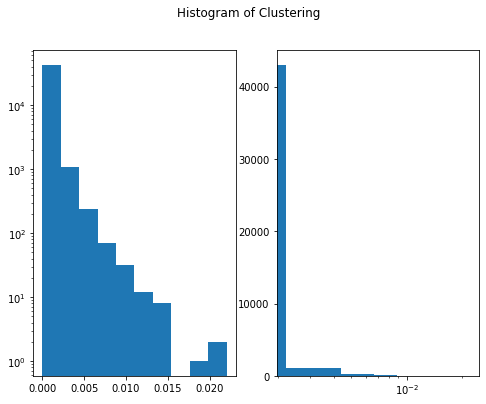

In [30]:
hist_plot(fb)

The network seems to follow a scale-free network, like the BA. 

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

don't know how to threshold. Look at the last 3 days and 30min. Nodes are around 5000, but too few edges.

In [31]:
fb_vis = aggregated_network(d=3, min=30)
N_vis = fb_vis.number_of_nodes()
E_vis = fb_vis.number_of_edges()
    
    
    
print('Number of Nodes: ' + str(N_vis))  
print('Number of Edges: ' + str(E_vis))

Number of Nodes: 5485
Number of Edges: 4805


In [ ]:
# visualize(fb_vis)

In [ ]:
from IPython.display import Image
Image("/Users/j./Desktop/UCPH/Social Data Science/Exercises/ex 9/fb_vis.png")